# Anjali Yadav

# ML Facial recognition to detect mood and suggest songs accordingly (Advanced - level)

# Import libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cv2
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

# reading image

In [2]:
img_array = cv2.imread("C:/Users/USER/Downloads/train/angry/Training_3908.jpg")

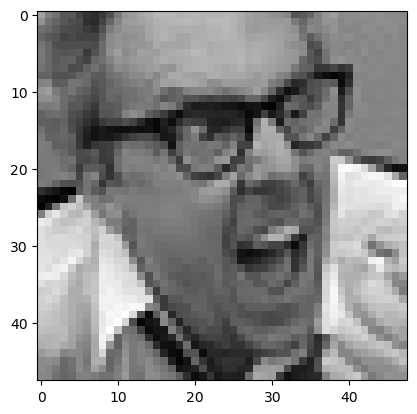

In [3]:
plt.imshow(img_array)

In [4]:
train_dir = "C:/Users/USER/Downloads/train"
test_dir = "C:/Users/USER/Downloads/test"

Classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

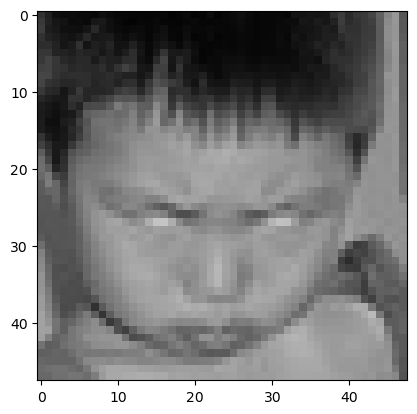

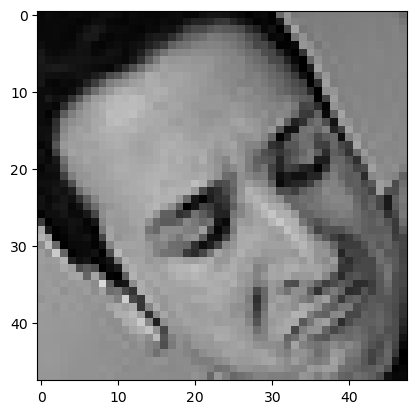

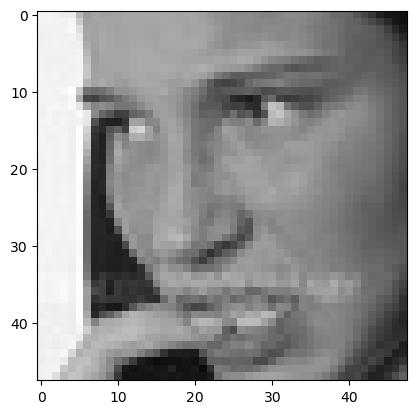

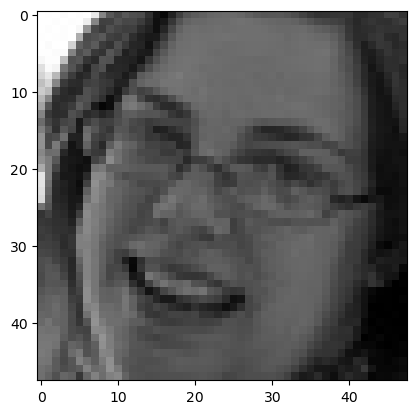

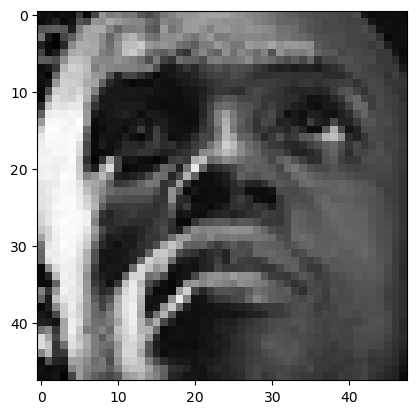

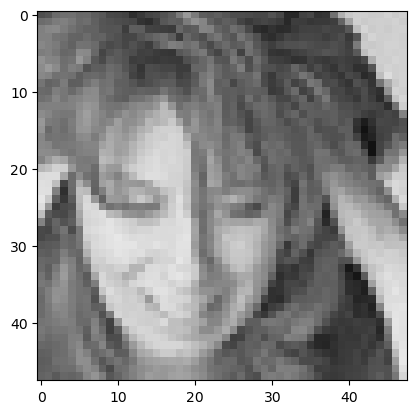

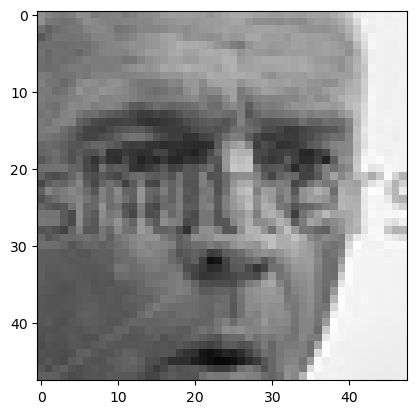

In [5]:
for category in Classes:
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break

In [6]:
picture_size = 48
batch_size  = 128
data_gen  = data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

training_data = data_gen.flow_from_directory(directory=train_dir,
                                            target_size = (picture_size,picture_size),
                                            seed=666,
                                            color_mode = "grayscale",
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle = True)

test_data = data_gen.flow_from_directory(directory=test_dir,
                                            target_size = (picture_size,picture_size),
                                            seed=666,
                                            color_mode = "grayscale",
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
#model building
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



optimizer = RMSprop(lr=0.01)

model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

D:\anoconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
steps_per_epoch = training_data.n // training_data.batch_size
validation_steps = test_data.n // test_data.batch_size
num_epochs = 20


history = model.fit(training_data, epochs=num_epochs,
          validation_data=test_data, verbose=1, steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps)

Epoch 1/20
224/224 [==============================] - 2810s 13s/step - loss: 1.9362 - accuracy: 0.2973 - val_loss: 1.6798 - val_accuracy: 0.3214
Epoch 2/20
224/224 [==============================] - 3970s 18s/step - loss: 1.4003 - accuracy: 0.4606 - val_loss: 1.5801 - val_accuracy: 0.4040
Epoch 3/20
224/224 [==============================] - 1115s 5s/step - loss: 1.2587 - accuracy: 0.5211 - val_loss: 1.3125 - val_accuracy: 0.4965
Epoch 4/20
224/224 [==============================] - 1243s 6s/step - loss: 1.1670 - accuracy: 0.5617 - val_loss: 1.2548 - val_accuracy: 0.5166
Epoch 5/20
224/224 [==============================] - 730s 3s/step - loss: 1.0998 - accuracy: 0.5888 - val_loss: 1.3122 - val_accuracy: 0.4989
Epoch 6/20
224/224 [==============================] - 739s 3s/step - loss: 1.0327 - accuracy: 0.6138 - val_loss: 1.3896 - val_accuracy: 0.4637
Epoch 7/20
224/224 [==============================] - 754s 3s/step - loss: 0.9766 - accuracy: 0.6366 - val_loss: 1.4666 - val_accuracy: 

In [10]:
model.save("face_detection_model.h5")

In [11]:
test_loss, test_acc = model.evaluate(test_data)
print("validation accuracy: ", str(test_acc*100)+"%")
print("validation loss: ", test_loss)

57/57 [==============================] - 26s 459ms/step - loss: 1.4650 - accuracy: 0.5341
validation accuracy:  53.413206338882446%
validation loss:  1.4650025367736816


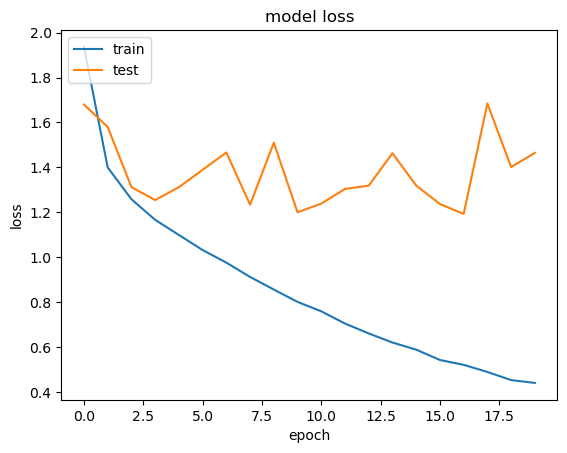

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
y_pred = np.argmax(model.predict(test_data), axis=-1)

57/57 [==============================] - 27s 465ms/step


In [15]:
print(classification_report(test_data.classes, y_pred, target_names=test_data.class_indices.keys()))

              precision    recall  f1-score   support

       angry       0.13      0.08      0.09       958
     disgust       0.00      0.00      0.00       111
        fear       0.14      0.06      0.08      1024
       happy       0.24      0.17      0.20      1774
     neutral       0.16      0.19      0.18      1233
         sad       0.16      0.36      0.23      1247
    surprise       0.11      0.09      0.10       831

    accuracy                           0.17      7178
   macro avg       0.13      0.14      0.13      7178
weighted avg       0.16      0.17      0.15      7178



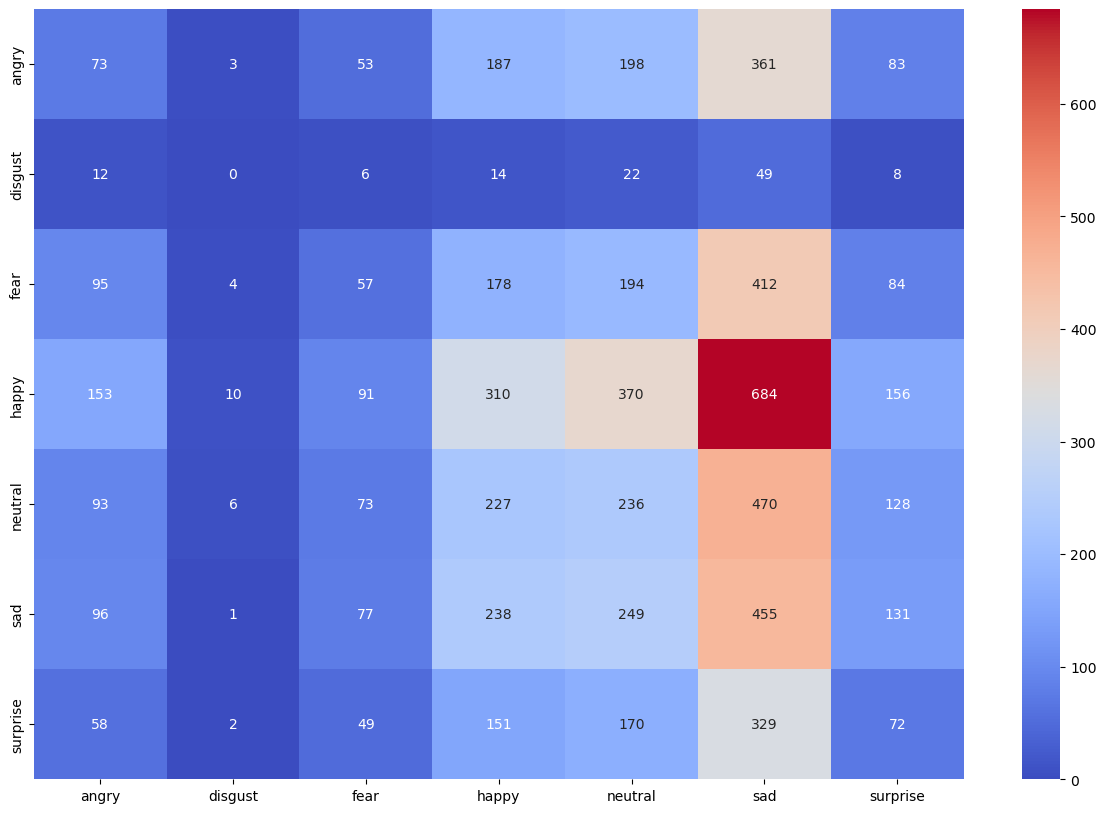

In [16]:
cm = confusion_matrix(test_data.classes, y_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm, cmap=plt.cm.coolwarm, annot=True, fmt='.0f', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.show()

# testing our model with new image

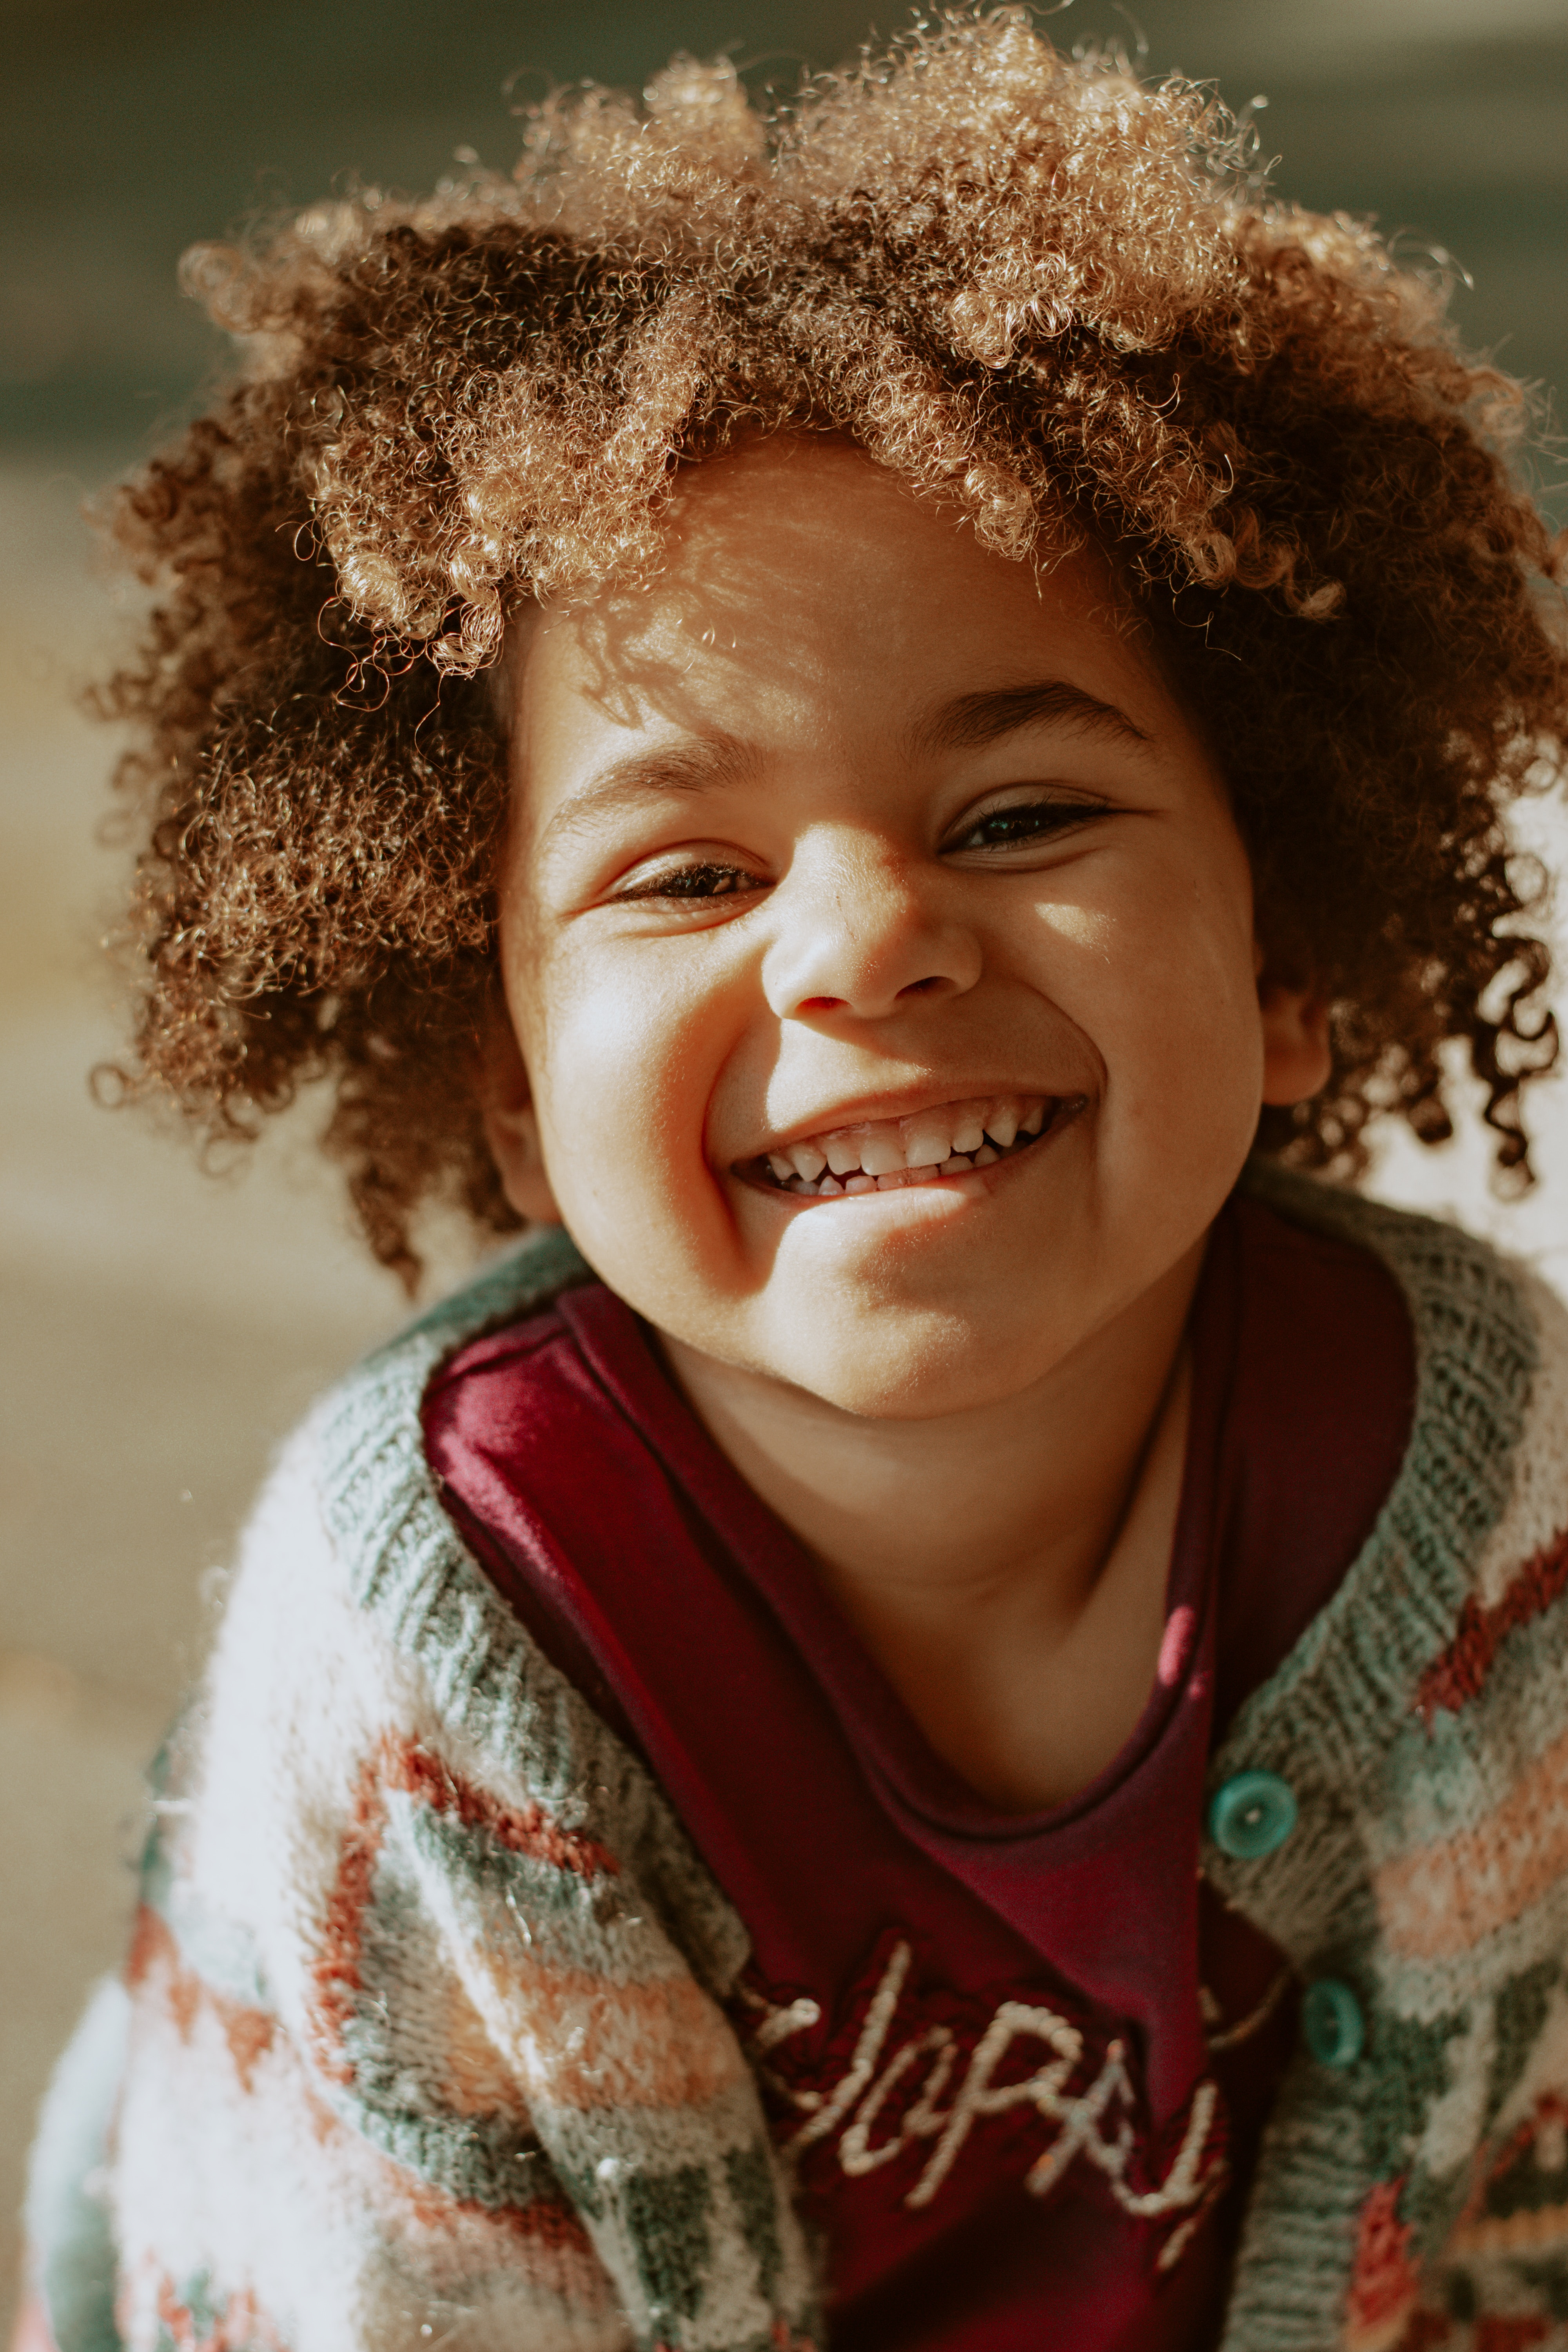

In [85]:
frame = cv2.imread("C:/Users/USER/Downloads/happy face.jpg")
from IPython.display import Image
Image(filename='C:/Users/USER/Downloads/happy face.jpg')

# model prediction

In [86]:
import cv2
from keras.models import load_model
import os


model = load_model("face_detection_model.h5")

EMOTIONS = ['Angry', 'Disgust', 'Happy', 'Sad', 'Surprise', 'Neutral']
# Load image
img = frame

# Trim the image to 48 x 48, and turn the grayscale image, normalization
frame = cv2.resize(img,(48,48),interpolation=cv2.INTER_BITS2)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) / 255.0

# Reinvent the image dimension
gray = gray.reshape(1,48,48,1)

# Output the prediction
predicts = model.predict(gray)[0]
label = EMOTIONS[predicts.argmax()]
for (i,j) in zip(range(7),EMOTIONS):
    predictss = predicts[i]
    print("{:^10s}".format(j)+"prediction rate is   {0:.2f}%".format(predictss))
print( "\n\n The system considers this expression to be:",label)


1/1 [==============================] - 0s 226ms/step
  Angry   prediction rate is   0.05%
 Disgust  prediction rate is   0.00%
  Happy   prediction rate is   0.04%
   Sad    prediction rate is   0.02%
 Surprise prediction rate is   0.14%
 Neutral  prediction rate is   0.74%


 The system considers this expression to be: Neutral


# for real time

In [82]:
from keras.models import load_model
from time import sleep



face_classifier = cv2.CascadeClassifier(r'C:\Users\USER\Downloads\haarcascades_haarcascade_frontalface_default.xml')
model = load_model(r"C:\Users\USER\ML Facial recognition to detect mood and suggest songs accordingly\face_detection_model.h5")
EMOTIONS = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = model.predict(roi)[0]
            label=EMOTIONS[prediction.argmax()]
            label_position = (x,y-10)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


# song recommendation

In [83]:
from IPython.display import Audio
from IPython.core.display import display
import random

In [84]:
if (label=='angry'):
    path="./songs/angry/"
    files=os.listdir(path)
    d=random.choices(files)
    print('Now playing:',d)
    audio = Audio(filename='./songs/angry/'+ d, autoplay=True)
    display(audio)
    
elif(label=='disgust'):
    path="./songs/disgust/"
    files=os.listdir(path)
    d=random.choices(files)
    print('Now playing:',d)
    audio = Audio(filename='./songs/disgust/ '+d, autoplay=True)
    display(audio)
    
elif(label=='happy'): 
    path="./songs/happy/"
    files=os.listdir(path)
    d=random.choices(files)
    print('Now playing:',d)
    audio = Audio(filename='./songs/happy/'+d, autoplay=True)
    display(audio)
    
elif(label=='sad'): 
    path="./songs/sad/"
    files=os.listdir(path)
    d=random.choices(files)
    print('Now playing:',d)
    audio = Audio(filename='./songs/sad/'+d, autoplay=True)
    display(audio)
    
elif(label=='surprise'): 
    path="./songs/surprise/"
    files=os.listdir(path)
    d=random.choices(files)
    print('Now playing:',d)
    audio = Audio(filename='./songs/surprise/'+d, autoplay=True)
    display(audio) 
    
else: 
    path="./songs/neutral/"
    files=os.listdir(path)
    d=random.choices(files)
    print('Now playing:',d)
    audio = Audio(filename='./songs/neutral/'+d, autoplay=True)
    display(audio)    
    

Now playing: ['Tadap Tadap Ke (Hum Dil De Chuke Sanam).mp3']


TypeError: can only concatenate str (not "list") to str